## Hierarchical Clustering for Customer Data

In [11]:
# -------------------------------
# 1. Import libraries
# -------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
import plotly.graph_objs as go




In [12]:
# -------------------------------
# 2. Load dataset
# -------------------------------
df = pd.read_csv("Mall_Customers.csv")
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [13]:
# -------------------------------
# 3. Data preprocessing
# -------------------------------
# Encode Gender column
label_encoder = preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
# Check for missing values
print(df.isnull().sum())
# Summary statistics
print(df.describe())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
       CustomerID      Gender         Age  Annual Income (k$)  \
count  200.000000  200.000000  200.000000          200.000000   
mean   100.500000    0.440000   38.850000           60.560000   
std     57.879185    0.497633   13.969007           26.264721   
min      1.000000    0.000000   18.000000           15.000000   
25%     50.750000    0.000000   28.750000           41.500000   
50%    100.500000    0.000000   36.000000           61.500000   
75%    150.250000    1.000000   49.000000           78.000000   
max    200.000000    1.000000   70.000000          137.000000   

       Spending Score (1-100)  
count              200.000000  
mean                50.200000  
std                 25.823522  
min                  1.000000  
25%                 34.750000  
50%                 50.000000  
75%                 73.000000  
max  

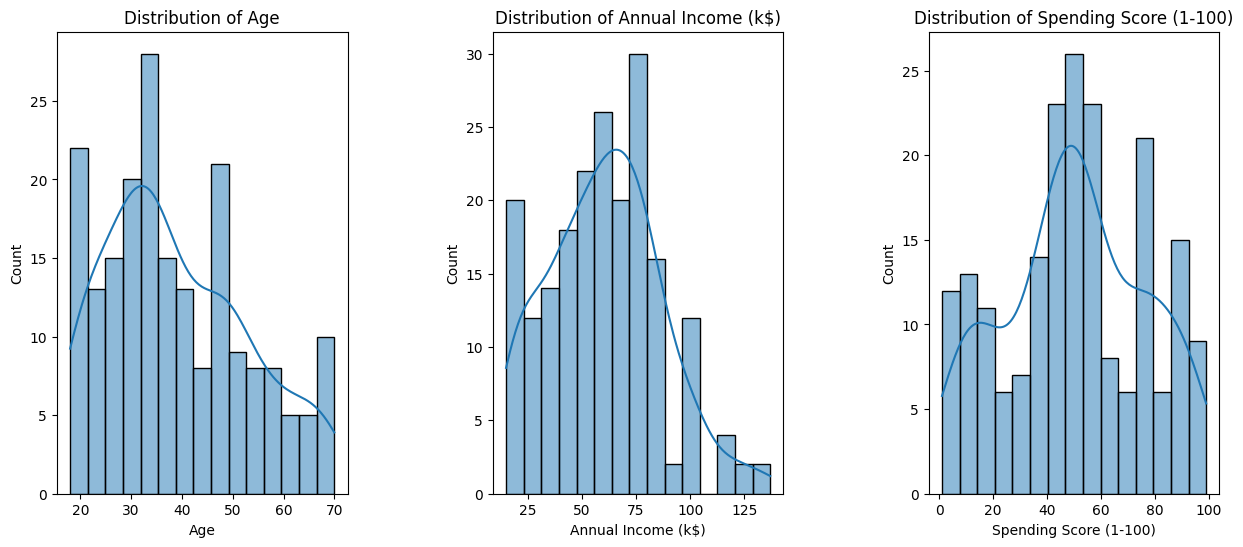

In [14]:

# -------------------------------
# 4. Exploratory Data Analysis
# -------------------------------
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(df[x] , bins = 15, kde=True)
    plt.title('Distribution of {}'.format(x))
plt.show()


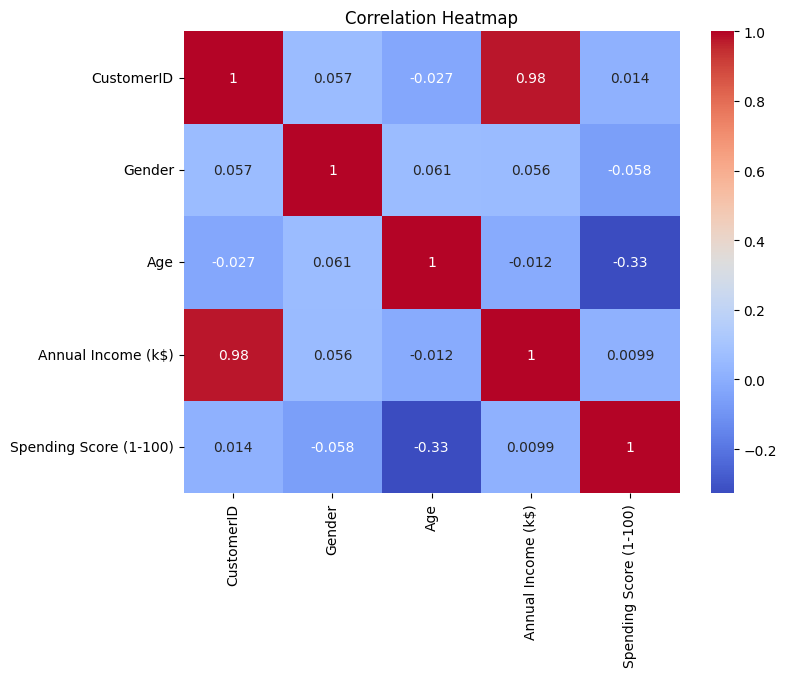

In [15]:
# Heatmap of correlations
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [16]:

# -------------------------------
# 5. Feature selection for clustering
# -------------------------------
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


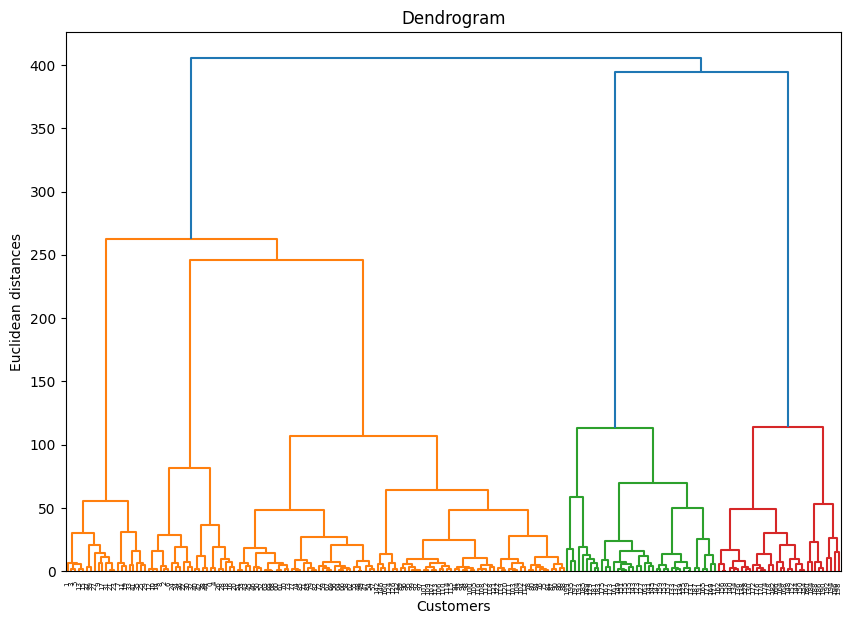

In [17]:
# -------------------------------
# 6. Dendrogram (to decide number of clusters)
# -------------------------------
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(X, method="ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

In [18]:

# -------------------------------
# 7. Hierarchical Clustering
# -------------------------------
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)



In [19]:
# Add cluster to dataframe
df['Cluster'] = y_hc

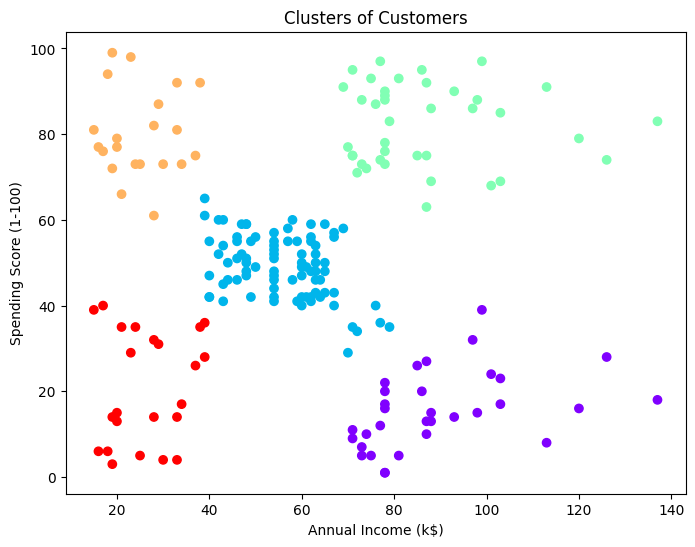

In [20]:
# -------------------------------
# 8. Visualization of Clusters (2D)
# -------------------------------
plt.figure(figsize=(8,6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=df['Cluster'], cmap='rainbow')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Clusters of Customers")
plt.show()


In [21]:

# -------------------------------
# 9. 3D Visualization
# -------------------------------
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color = df['Cluster'],
        size= 10,
        line=dict(color= df['Cluster'], width=1)
    )
)

fig = go.Figure(data=[trace1])
fig.update_layout(
    title="3D Cluster Visualization",
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Spending Score',
        zaxis_title='Annual Income'
    )
)
fig.show()


In [22]:

# -------------------------------
# 10. Final clustered data
# -------------------------------
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1   19                  15                      39   
1           2       1   21                  15                      81   
2           3       0   20                  16                       6   
3           4       0   23                  16                      77   
4           5       0   31                  17                      40   

   Cluster  
0        4  
1        3  
2        4  
3        3  
4        4  
